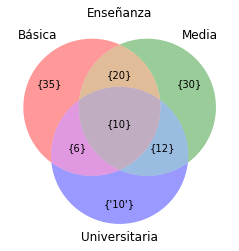

In [2]:
"""4. Se encuesta a 150 familias consultando por el nivel educacional actual de sus hijos.
Los resultados obtenidos son:
 ▪ 10 familias tienen hijos en Enseñanza Básica, Enseñanza Media y Universitaria.
 ▪ 16 familias tienen hijos en Enseñanza Básica y Universitaria
 ▪ 30 familias tienen hijos en Enseñanza Media y Enseñanza Básica.
 ▪ 22 familias tienen hijos en Enseñanza Media y Universitaria.
 ▪ 72 familias tienen hijos en Enseñanza Media.
 ▪ 71 familias tienen hijos en Enseñanza Básica.
 ▪ 38 familias tienen hijos en Enseñanza Universitaria.
Con la información anterior, deducir:
- El número de familias que solo tienen hijos universitarios.
- El número de familias que tienen hijos solo en dos niveles.
- El número de familias que tienen hijos que no estudian.
"""
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
B = {10, 6, 20, 35}
M = {10, 20, 12, 30}
U = {10, 6, 12, '10'}
#UT={10}

diagram = venn3((1, 1, 1, 1, 1, 1, 1), set_labels=(
    'Básica', 'Media', 'Universitaria'))
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_text(subset)
plt.title("Enseñanza")
diagram.get_label_by_id("111").set_text(B & M & U)
diagram.get_label_by_id("110").set_text((B & M)-U)
diagram.get_label_by_id("101").set_text((B & U)-M)
diagram.get_label_by_id("100").set_text(B-(M | U))
diagram.get_label_by_id("011").set_text((U & M)-B)
diagram.get_label_by_id("010").set_text(M-(U | B))
diagram.get_label_by_id("001").set_text(U-(M | B))

plt.show()

B={10, 35, 20, 6}
M={10, 20, 12, 30}
U={10, 12, 6}
B & U={10, 6}
M & B={10, 20}
M & U={10, 12}
B & M & U={10}
{10}
{20, 12, 6}
{35, 6, 10, 12, 20, 30}
27


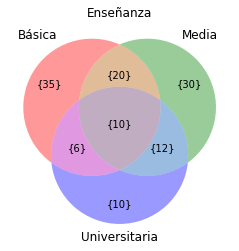

In [3]:
"""4. Se encuesta a 150 familias consultando por el nivel educacional actual de sus hijos.
Los resultados obtenidos son:
 ▪ 10 familias tienen hijos en Enseñanza Básica, Enseñanza Media y Universitaria.{B & M & U}
 ▪ 16 familias tienen hijos en Enseñanza Básica y Universitaria 
 ▪ 30 familias tienen hijos en Enseñanza Media y Enseñanza Básica.
 ▪ 22 familias tienen hijos en Enseñanza Media y Universitaria. 
 ▪ 72 familias tienen hijos en Enseñanza Media. {M}
 ▪ 71 familias tienen hijos en Enseñanza Básica. {B}
 ▪ 38 familias tienen hijos en Enseñanza Universitaria.{U}
Con la información anterior, deducir:
- El número de familias que solo tienen hijos universitarios.
- El número de familias que tienen hijos solo en dos niveles.
- El número de familias que tienen hijos que no estudian.
"""

from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

Universal = 150
# ▪ 71 familias tienen hijos en Enseñanza Básica. {B}
B = set({10, 6, 20, 35})
#  ▪ 72 familias tienen hijos en Enseñanza Media. {M}
M = set({10, 20, 12, 30})
#  ▪ 38 familias tienen hijos en Enseñanza Universitaria.{U}
U = set({10, 6, 12, 10})  # elimina el 10 repetido

# control
print(f"B={B}")  # {10, 35, 20, 6}
print(f"M={M}")  # {10, 20, 12, 30}
print(f"U={U}")  # {10, 12, 6} elimina el 10 repetido

#  ▪ 16 familias tienen hijos en Enseñanza Básica y Universitaria {B & U}
print(f"B & U={B & U}")  # {10, 6}
#  ▪ 30 familias tienen hijos en Enseñanza Media y Enseñanza Básica.{M & B}
print(f"M & B={M & B}")  # {10, 20}
#  ▪ 22 familias tienen hijos en Enseñanza Media y Universitaria. {M & U}
print(f"M & U={M & U}")  # {10, 12}


# ▪ 10 familias tienen hijos en Enseñanza Básica, Enseñanza Media y Universitaria.{B & M & U}
# diagram.get_label_by_id("111").set_text(B & M & U)
print(f"B & M & U={B & M & U}")  # {10}

# Con la información anterior, deducir:
# - El número de familias que solo tienen hijos universitarios.
soloU = U - ((B & U)-M) - ((U & M)-B)
print(soloU)

# - El número de familias que tienen hijos solo en dos niveles.
solo2N = ((M & B) ^ (B & U) | (U & M) - (B & M & U))
print(solo2N)
# - El número de familias que tienen hijos que no estudian.
# Calculo los que estudian
Estudian = B | M | U
print(Estudian)

# defino función que suma los elementos para calcular quiénes no Estudian
def suma(conjuntos):
    suma = 0
    for elem in conjuntos:
        suma = suma + elem
    return suma

# tengo que considerar los que estudian y los universitarios ya que al
# estar repetido el valor el grupo de los que estudian no lo toma
# por eso llamo dos veces a la función con distintos conjuntos

noEstudian = Universal - suma(Estudian) - suma(soloU)
print(noEstudian)

diagram = venn3((1, 1, 1, 1, 1, 1, 1), set_labels=(
    'Básica', 'Media', 'Universitaria'))
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_text(subset)
plt.title("Enseñanza")
diagram.get_label_by_id("111").set_text(B & M & U)  # 10
diagram.get_label_by_id("110").set_text((B & M)-U)  # 20
diagram.get_label_by_id("101").set_text((B & U)-M)  # 6
diagram.get_label_by_id("100").set_text(B-(M | U))  # 35
diagram.get_label_by_id("011").set_text((U & M)-B)  # 12
diagram.get_label_by_id("010").set_text(M-(U | B))  # 30
diagram.get_label_by_id("001").set_text(U - ((B & U)-M) - ((U & M)-B))  # 10
plt.show()

# Falta responder las preguntas


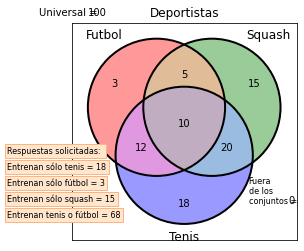

In [2]:
"""
En una comunidad de 100 deportistas se sabe que 30 de ellos entrenan fútbol, 50 entrenan squash 
y 60 entrenan tenis. 22 entrenan tenis y fútbol, 30 entrenan squash y tenis y 15 entrenan squash y fútbol. 
Se tomó un registro de los consultados en diferentes estructuras, lista, tupla y diccionarios.
Preguntas:
Si 10 deportistas entrenan los tres deportes 
1-¿cuántos entrenan sólo tenis?
2-¿cuántos entrenan sólo fútbol?
3-¿cuántos entrenan sólo squash?
4-¿cuántos entrenan tenis o fútbol?
"""

from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

lista_futbol = [4, 7, 9, 3, 5, 2]
tupla_squash = (10, 3, 9, 7, 5, 12, 4)
diccio_tenis = {"infantil": 12,  "juniors": 15,
                "adolescentes": 16, "adultos": 17}

# sumamos los elementos de cada estructura utilizando funciones

def suma_futbol(lista_futbol):
    suma = 0
    for elemento in lista_futbol:
        suma = suma + elemento
    return suma

def suma_squash(tupla_squash):
    suma = 0
    for elemento in tupla_squash:
        suma = suma + elemento
    return suma

def suma_tenis(diccio_tenis):
    suma = 0
    for elemento in diccio_tenis.values():
        suma = suma + elemento
    return suma

# Definimos e inicializamos variables

universal = 100
futbol = suma_futbol(lista_futbol)
squash = suma_squash(tupla_squash)
tenis = suma_tenis(diccio_tenis)
tenis_futbol = 22
squash_tenis = 30
squash_futbol = 15
squash_tenis_futbol = 10
ninguno = 0

# Funciones y operaciones

def solo2(x, y):
    z = x - y
    return z

def solo1(u, v, x, y):
    z = u - v - x - y
    return z

def tenis_o_futbol(s, t, u, v, x, y):
    z = s + t + u + v + x + y
    return z

soloFT = solo2(tenis_futbol, squash_tenis_futbol)

soloTS = solo2(squash_tenis, squash_tenis_futbol)

soloFS = solo2(squash_futbol, squash_tenis_futbol)

soloF = solo1(futbol, soloFT, soloFS, squash_tenis_futbol)

soloT = solo1(tenis, soloTS, soloFT, squash_tenis_futbol)

soloS = solo1(squash, soloFS, soloTS, squash_tenis_futbol)

tenis_o_futbol = tenis_o_futbol(
    soloFT, soloTS, soloFS, soloF,  soloT, squash_tenis_futbol)

# preparamos la ventana del gráfico
plt.figure('Ejemplo de primer parcial ')

# dibujamos los diagramas
diagram = venn3((1, 1, 1, 1, 1, 1, 1), set_labels=(
    "Futbol", "Squash", "Tenis"))

# establecemos el tamaño de la fuente
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_fontsize(10)

# transferimos los resultados de las operaciones
diagram.get_label_by_id('100').set_text(soloF)
diagram.get_label_by_id('010').set_text(soloS)
diagram.get_label_by_id('001').set_text(soloT)
diagram.get_label_by_id('110').set_text(soloFS)
diagram.get_label_by_id('011').set_text(soloTS)
diagram.get_label_by_id('101').set_text(soloFT)
diagram.get_label_by_id('111').set_text(squash_tenis_futbol)

# marcamos los contornos
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1))

# agregamos más datos aclaratorios al gráfico
plt.text(-0.90, 0.67,      # Texto Universal =
         "Universal =",
         size=10)

plt.text(-0.60, 0.67,   # Cantidad universal
         universal,
         size=10)

plt.text(0.40, -0.5,      # Texto fuera del conjunto
         "Fuera\nde los\nconjuntos =",
         size=8)

plt.text(0.65, -0.5,    # Cantidad fuera de los conjuntos
         ninguno,  
         size=10)  

# Respondemos las preguntas
plt.text(-1.10, -0.20,  
         s="Respuestas solicitadas: ",
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.30,  
         s="Entrenan sólo tenis = " + str(soloT),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.40,  
         s="Entrenan sólo fútbol = " + str(soloF),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.50,  
         s="Entrenan sólo squash = " + str(soloS),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.60,  
         s="Entrenan tenis o fútbol = " + str(tenis_o_futbol),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.axis('on')   ## Recuadro 
plt.title("Deportistas")
plt.show()

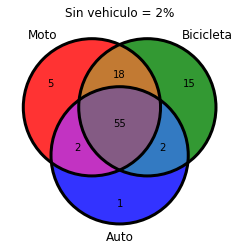

In [5]:
#Alumno = Nicolas Burgueño

from matplotlib import pyplot as plt
from matplotlib_venn import venn3,venn3_circles

#Funciones

def sumadic(**dic):            #Suma el diccionario
    z=0
    for i in auto.values():
        z+=i
    return z

def suma(*args):               #Para sumar la lista y la tupla
    s=0
    for i in args:
        s+=i
    return s

resta = lambda u,v,x,y:u-v-x-y #Calcula el total de uno de los circulos del diagrama de venn
suma_v = lambda u,v,x:u+v+x    #Calcula el total de personas con un vehiculo 

#Variables

moto = [14, 17, 9, 13, 15, 12]
bici = (17, 8, 9, 7, 10, 11, 12, 4, 12)
auto = {"Chico":27,"Mediano":17,"Grande":16}

moto = suma(*moto)              #total de motos
bici = suma(*bici)              #total de bicis
auto = sumadic(**auto)          #total de autos
ningun = 2                      #ningun vehiculo
tres_v = 55                     #tres vehiculos
ba = 2                          #bici y auto
mb = 18                         #moto y bici
soloa = 1                       #solo auto

#Respuestas

solob = resta(bici ,tres_v ,mb ,ba ) #Porcentaje de los que tienen bici                (respuesta 4)
ma = resta(auto ,tres_v ,ba ,soloa ) #Porcentaje de los que tienen moto y auto         (respuesta 2)
solom = resta(moto ,tres_v ,mb ,ma ) #Porcentaje de los que tienen solo moto      (respuesta 3)
un_vec = suma_v (solob ,solom ,soloa ) #Porcentaje de los que tienen un vehiculo     (respuesta 1)

#Diagrama de venn

diagrama = venn3((1,1,1,1,1,1,1),set_labels=("Moto","Bicicleta","Auto"),alpha=0.8)

#Etiquetas de las partes

diagrama.get_label_by_id('100').set_text(solom)
diagrama.get_label_by_id('010').set_text(solob)
diagrama.get_label_by_id('001').set_text(soloa)
diagrama.get_label_by_id('110').set_text(mb)
diagrama.get_label_by_id('101').set_text(ma)
diagrama.get_label_by_id('011').set_text(ba)
diagrama.get_label_by_id('111').set_text(tres_v)

venn3_circles(subsets=(1,1,1,1,1,1,1),color="#000000",alpha=1,linestyle="-",linewidth="3")

plt.title("Sin vehiculo = 2%")
plt.show()


